In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#import itertools
#from causal_ccm.causal_ccm import ccm

In [2]:
pbr7_16S_Chlamy_or_Bac_data = 'C:/Users/klbal/Desktop/Internship #2/my_data/pbr7_16S_Chlamy_or_Bac_data.txt'

pbr7_16S_df_Chlamy_or_Bac = pd.read_csv(pbr7_16S_Chlamy_or_Bac_data, delimiter='\t')

print(pbr7_16S_df_Chlamy_or_Bac)


      tube  day     chl.or.bac  counts
0        1    0  Chlamydomonas     NaN
1        1    0       Bacteria     NaN
2        2    0  Chlamydomonas     NaN
3        2    0       Bacteria     NaN
4        3    0  Chlamydomonas     NaN
...    ...  ...            ...     ...
2395     6  149       Bacteria     0.0
2396     7  149  Chlamydomonas     5.0
2397     7  149       Bacteria     0.0
2398     8  149  Chlamydomonas    27.0
2399     8  149       Bacteria     7.0

[2400 rows x 4 columns]


In [3]:
filtered_chlamy = pbr7_16S_df_Chlamy_or_Bac[pbr7_16S_df_Chlamy_or_Bac["chl.or.bac"] == "Chlamydomonas"]

filtered_bakti = pbr7_16S_df_Chlamy_or_Bac[pbr7_16S_df_Chlamy_or_Bac["chl.or.bac"] == "Bacteria"]




print(filtered_bakti)

      tube  day chl.or.bac  counts
1        1    0   Bacteria     NaN
3        2    0   Bacteria     NaN
5        3    0   Bacteria     NaN
7        4    0   Bacteria     NaN
9        5    0   Bacteria     NaN
...    ...  ...        ...     ...
2391     4  149   Bacteria    49.0
2393     5  149   Bacteria     5.0
2395     6  149   Bacteria     0.0
2397     7  149   Bacteria     0.0
2399     8  149   Bacteria     7.0

[1200 rows x 4 columns]


In [4]:
mean_bakti = filtered_bakti.groupby('day')['counts'].mean().reset_index()

mean_chlamy = filtered_chlamy.groupby('day')['counts'].mean().reset_index()

mean_bakti['counts'].fillna(0, inplace=True)

mean_chlamy['counts'].fillna(0, inplace=True)


print(mean_bakti)

print(mean_chlamy)

     day      counts
0      0    0.000000
1      1   71.666667
2      2  143.125000
3      3  140.750000
4      4  137.750000
..   ...         ...
145  145   23.750000
146  146   28.875000
147  147   22.000000
148  148   24.250000
149  149   34.875000

[150 rows x 2 columns]
     day     counts
0      0   0.000000
1      1  78.333333
2      2   6.875000
3      3   9.250000
4      4  12.250000
..   ...        ...
145  145  15.250000
146  146  10.250000
147  147   3.500000
148  148   4.500000
149  149   6.250000

[150 rows x 2 columns]


C:\Users\klbal\AppData\Local\Temp\ipykernel_12784\1393861096.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mean_bakti['counts'].fillna(0, inplace=True)
C:\Users\klbal\AppData\Local\Temp\ipykernel_12784\1393861096.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

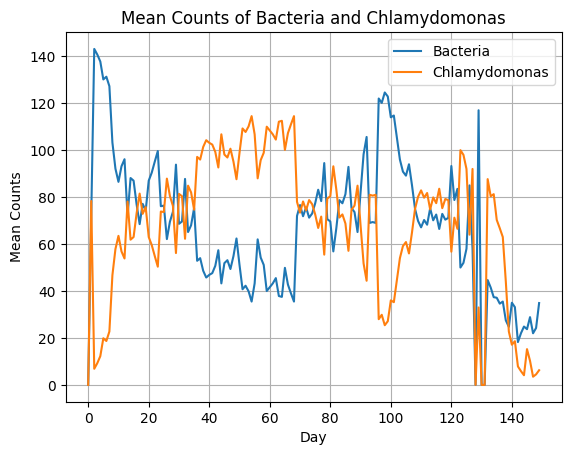

In [7]:
plt.plot(mean_bakti["day"], mean_bakti["counts"], label='Bacteria')
plt.plot(mean_chlamy["day"], mean_chlamy["counts"], label='Chlamydomonas')
plt.xlabel("Day")
plt.ylabel("Mean Counts")
plt.title("Mean Counts of Bacteria and Chlamydomonas")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
print(mean_bakti["counts"])

0        0.000000
1       71.666667
2      143.125000
3      140.750000
4      137.750000
          ...    
145     23.750000
146     28.875000
147     22.000000
148     24.250000
149     34.875000
Name: counts, Length: 150, dtype: float64
